Detailed panel by panel comparison of bathymetry 201702 to 201803d and the river file for 201803 (which was done earlier than d)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from salishsea_tools import river_202101 as r202101
from salishsea_tools import river_201803 as r201803

%matplotlib inline

In [2]:
b201702 = xr.open_dataset('../../../../grid/bathymetry_201702.nc')
b201803d = xr. open_dataset('../../../../sea_initial_hg/bathymetry_201803d.nc')

In [3]:
r202102 = xr.open_dataset('../../../../rivers-climatology/rivers_daily_202102.nc').rorunoff[5]
r201803 = xr.open_dataset('../../../../sea_initial_hg/rivers_month_201803.nc').rorunoff[5]
d202102 = xr.open_dataset('../../../../rivers-climatology/rivers_daily_202102.nc').rodepth[5]
d201803 = xr.open_dataset('../../../../sea_initial_hg/rivers_month_201803.nc').rodepth[:]

In [4]:
def make_the_plots(istart, iend, jstart,jend):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    colours = axs[0, 0].pcolormesh(np.arange(jstart, jend+1), np.arange(istart, iend+1), b201702.Bathymetry[istart:iend, jstart:jend],
            cmap='nipy_spectral', vmax=15);
    axs[0, 1].pcolormesh(np.arange(jstart, jend+1), np.arange(istart, iend+1), b201803d.Bathymetry[istart:iend, jstart:jend],
            cmap='nipy_spectral', vmax=15);
    colours = axs[0, 2].pcolormesh(np.arange(jstart, jend+1), np.arange(istart, iend+1), 
             (b201803d.Bathymetry[istart:iend, jstart:jend].fillna(0) 
            - b201702.Bathymetry[istart:iend, jstart:jend].fillna(0)), cmap='Blues_r');
    highest = np.max(b201803d.Bathymetry[istart:iend, jstart:jend].fillna(0) 
            - b201702.Bathymetry[istart:iend, jstart:jend].fillna(0)).item()
    lowest = np.min(b201803d.Bathymetry[istart:iend, jstart:jend].fillna(0) 
            - b201702.Bathymetry[istart:iend, jstart:jend].fillna(0)).item()
    axs[0, 2].text(jstart+10, iend-10, f'{lowest}-{highest}')
    for i in range(istart, iend):
        for j in range(jstart, jend):
            if r202102[i, j] > 0:
                axs[0, 0].plot(j, i, 'ro')
                axs[1, 0].scatter(j, i, c=d202102[i, j]/3., s=100)
                axs[1, 2].scatter(j, i, c='r',s=100)
    for i in range(istart, iend):
        for j in range(jstart, jend):
            if r201803[i, j] > 0:
                axs[0, 1].plot(j, i, 'ro')
                axs[1, 1].scatter(j, i, c=d201803[i, j]/3., s=100)
                axs[1, 2].scatter(j, i, c='b')
    for ax in axs[1]:
        ax.set_xlim(jstart, jend);
        ax.set_ylim(istart, iend);

## Tile Forty-nine
 * changed shape of bay, less smoothing

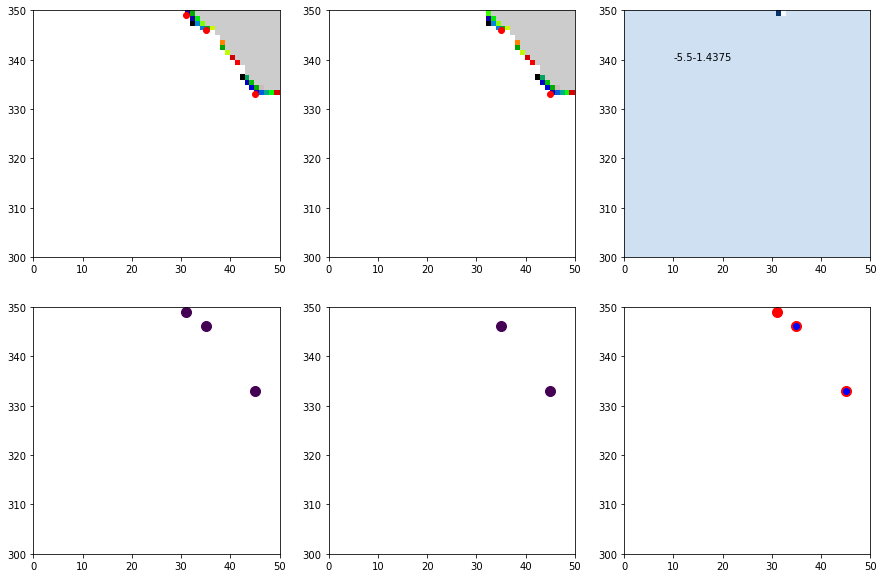

In [5]:
istart, iend = 300, 350
jstart, jend = 0, 50
make_the_plots(istart, iend, jstart,jend)

48.297725677490234 -124.39649963378906


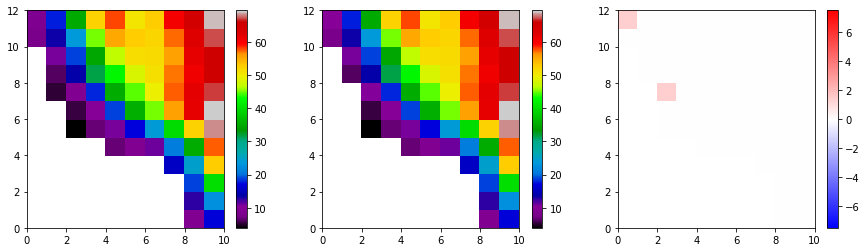

In [60]:
js, je = 30, 40
ii, ie = 342, 354
print (b201702.nav_lat[350, 32].item(), b201702.nav_lon[350, 32].item())
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);

## Tile Fifty

* remove some shallow mud flats near Pysht and Jordan River

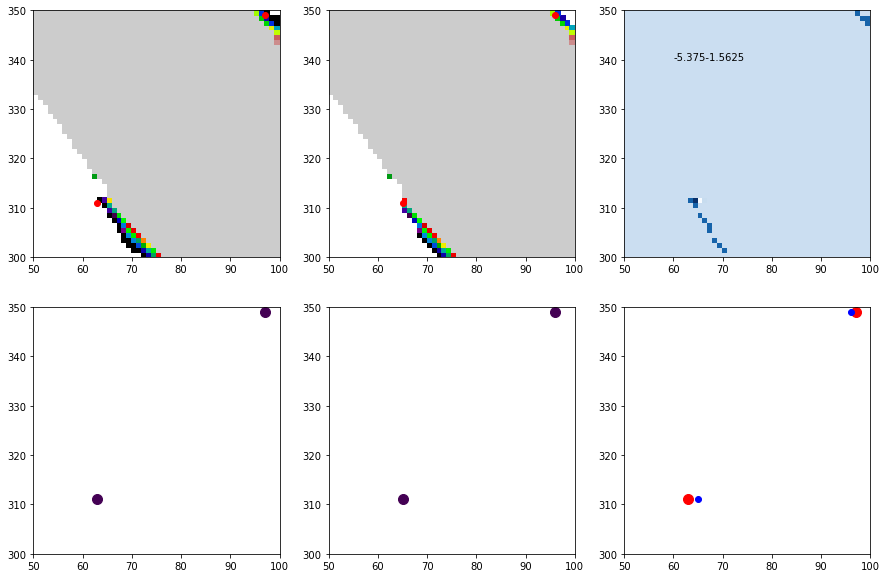

In [6]:
istart, iend = 300, 350
jstart, jend = 50, 100
make_the_plots(istart, iend, jstart,jend)

48.197227478027344 -124.10792541503906


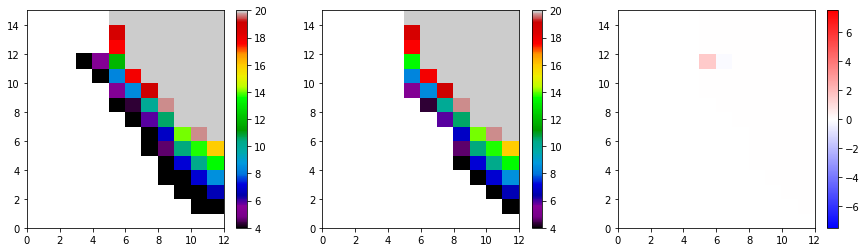

In [62]:
js, je = 60, 72
ii, ie = 300, 315
print (b201702.nav_lat[310, 62].item(), b201702.nav_lon[310, 62].item())
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);

48.42650604248047 -124.05432891845703


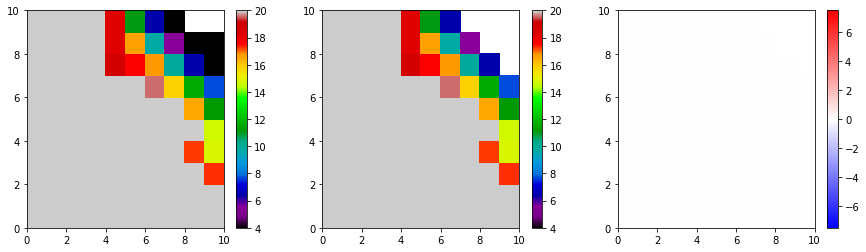

In [64]:
js, je = 90, 100
ii, ie = 340, 350
print (b201702.nav_lat[350, 98].item(), b201702.nav_lon[350, 98].item())
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);

## Tile Fifty-one

* deepening of one point I dont understand but whatever
* more shallow beach removed
* Sooke Harbour trimmed

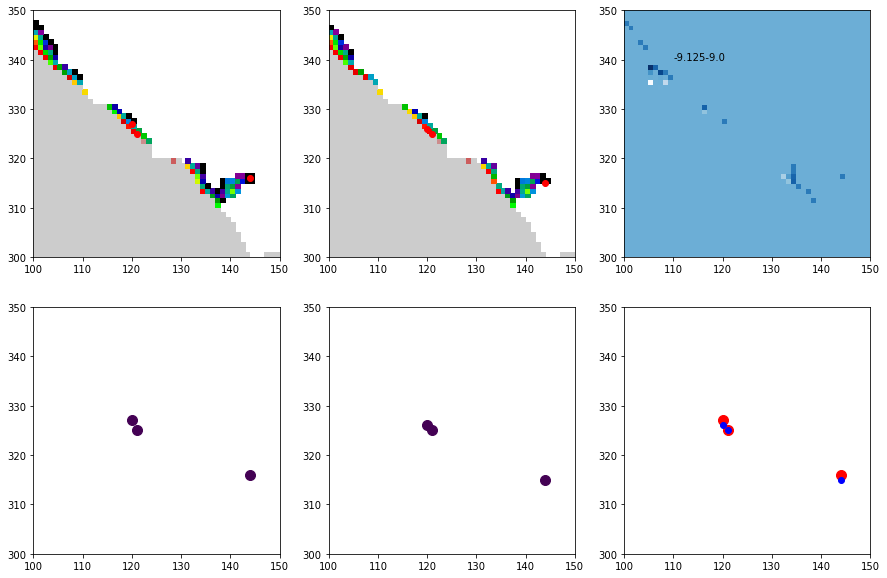

In [7]:
istart, iend = 300, 350
jstart, jend = 100, 150
make_the_plots(istart, iend, jstart,jend)

48.418487548828125 -124.0339584350586


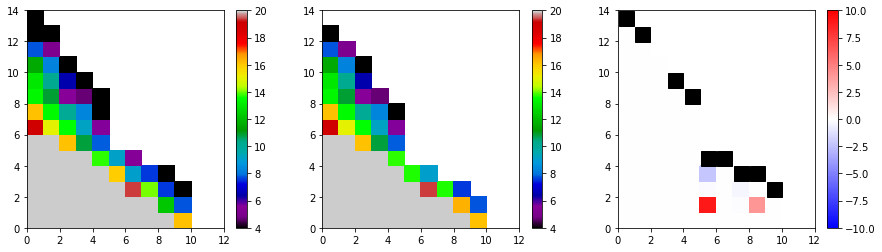

In [75]:
js, je = 100, 112
ii, ie = 334, 348
print (b201702.nav_lat[347, 100].item(), b201702.nav_lon[347, 100].item())
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-10, vmax=10);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ks', markersize=15)

48.37882614135742 -123.69371795654297


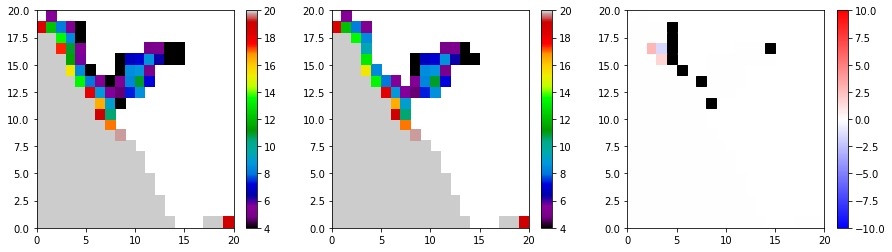

In [78]:
js, je = 130, 150
ii, ie = 300, 320
print (b201702.nav_lat[315, 145].item(), b201702.nav_lon[315, 145].item())
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-10, vmax=10);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ks', markersize=10)

## Tile Fifty-two

* reduction of shallows

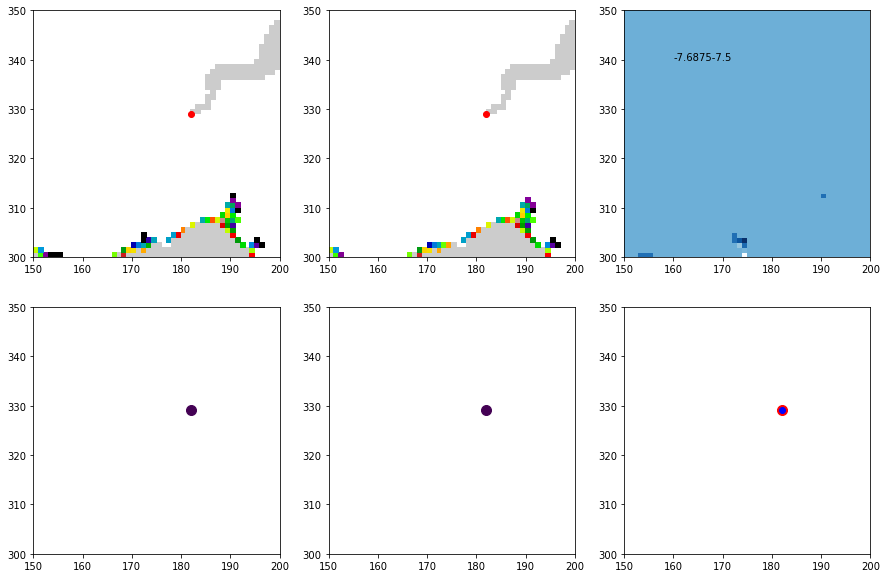

In [8]:
istart, iend = 300, 350
jstart, jend = 150, 200
make_the_plots(istart, iend, jstart,jend)

48.397151947021484 -123.50440216064453


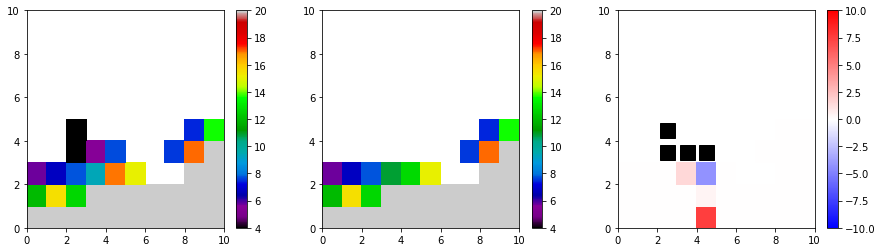

In [82]:
js, je = 170, 180
ii, ie = 300, 310
print (b201702.nav_lat[305, 175].item(), b201702.nav_lon[305, 175].item())
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-10, vmax=10);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ks', markersize=15)

## Tile Fifty-three

* connect Roche Harbor, point 319, 249, 4 m.

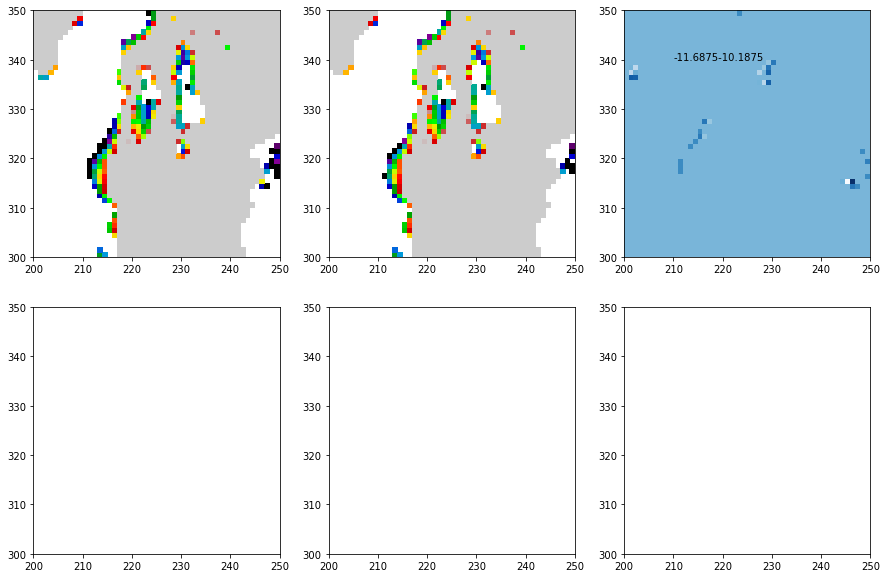

In [9]:
istart, iend = 300, 350
jstart, jend = 200, 250
make_the_plots(istart, iend, jstart,jend)

48.57103729248047 -123.17327117919922


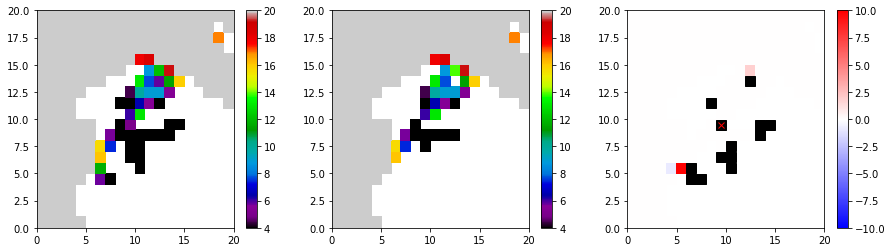

In [87]:
js, je = 240, 260
ii, ie = 310, 330
print (b201702.nav_lat[315, 245].item(), b201702.nav_lon[315, 245].item())
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-10, vmax=10);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ks', markersize=10)
axs[2].plot(249 - js + 0.5, 319 - ii + 0.5, 'rx' )

## Tile Fifty-four

* looks fine

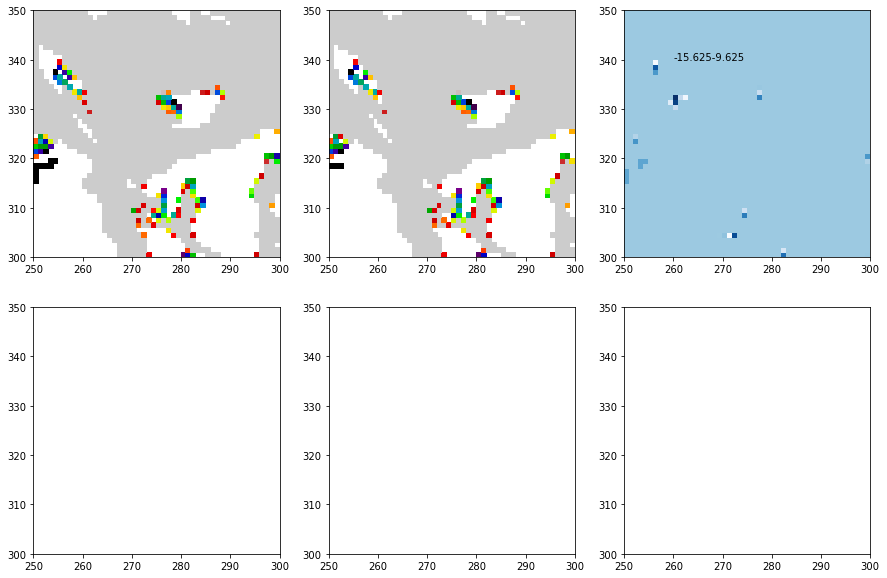

In [10]:
istart, iend = 300, 350
jstart, jend = 250, 300
make_the_plots(istart, iend, jstart,jend)

48.57103729248047 -123.17327117919922


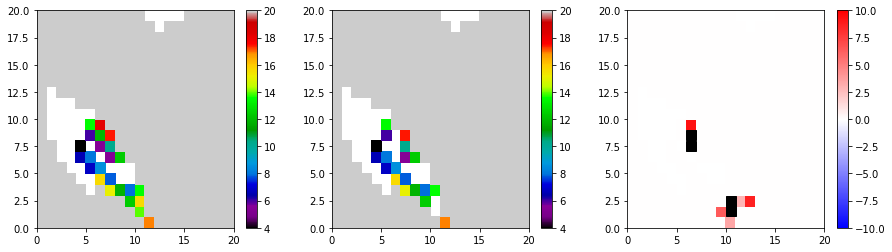

In [88]:
js, je = 250, 270
ii, ie = 330, 350
print (b201702.nav_lat[315, 245].item(), b201702.nav_lon[315, 245].item())
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-10, vmax=10);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ks', markersize=10)

48.57103729248047 -123.17327117919922


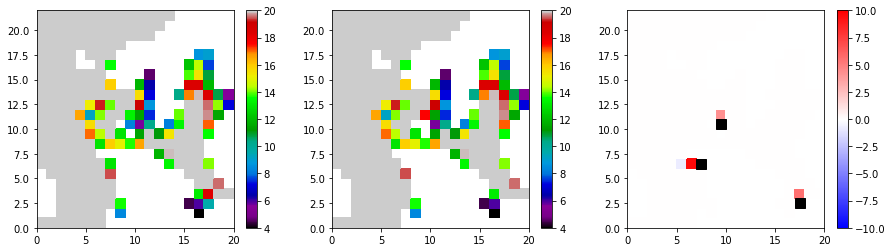

In [90]:
js, je = 265, 285
ii, ie = 298, 320
print (b201702.nav_lat[315, 245].item(), b201702.nav_lon[315, 245].item())
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-10, vmax=10);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ks', markersize=10)

## Tile Fifty-five

* remove the shallow Lummi Bay and behind Portage Island

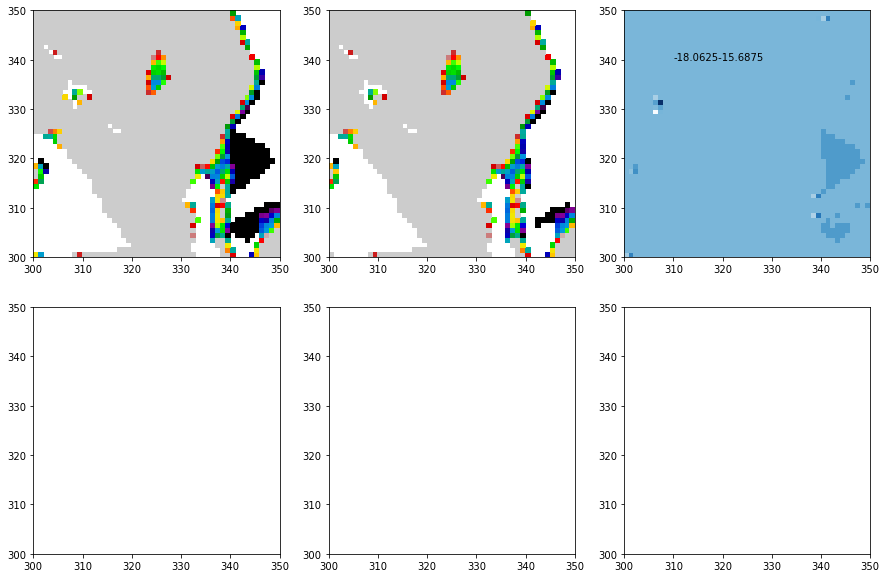

In [11]:
istart, iend = 300, 350
jstart, jend = 300, 350
make_the_plots(istart, iend, jstart,jend)

48.57103729248047 -123.17327117919922


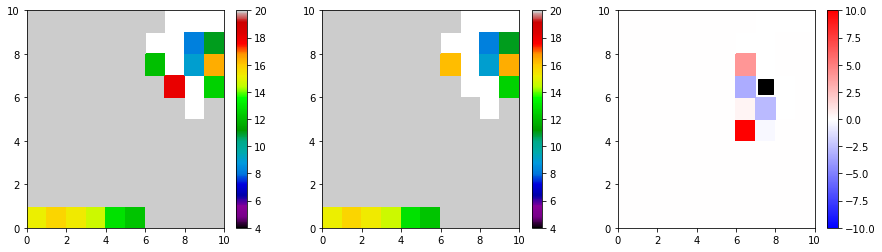

In [93]:
js, je = 300, 310
ii, ie = 325, 335
print (b201702.nav_lat[315, 245].item(), b201702.nav_lon[315, 245].item())
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-10, vmax=10);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ks', markersize=15)

## Tile Fifty-six

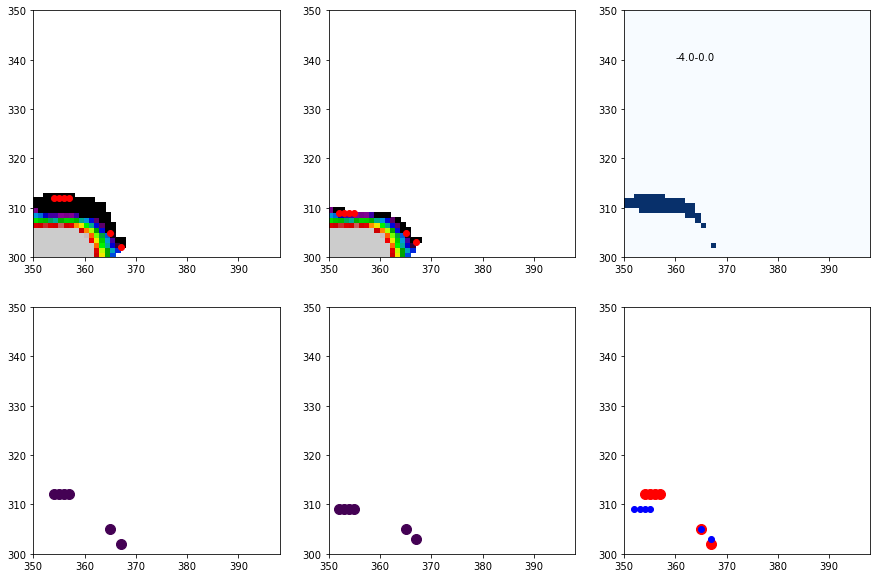

In [12]:
istart, iend = 300, 350
jstart, jend = 350, 398
make_the_plots(istart, iend, jstart,jend)

## Tile Fifty-Seven

* coastline changes

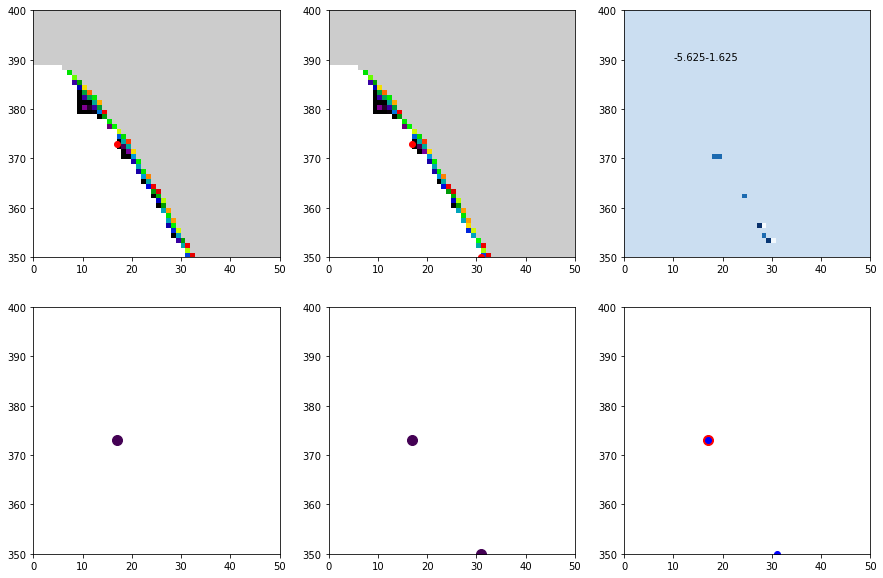

In [13]:
istart, iend = 350, 400
jstart, jend = 0, 50
make_the_plots(istart, iend, jstart,jend)

## Tile Fifty-eight

* coastline changes

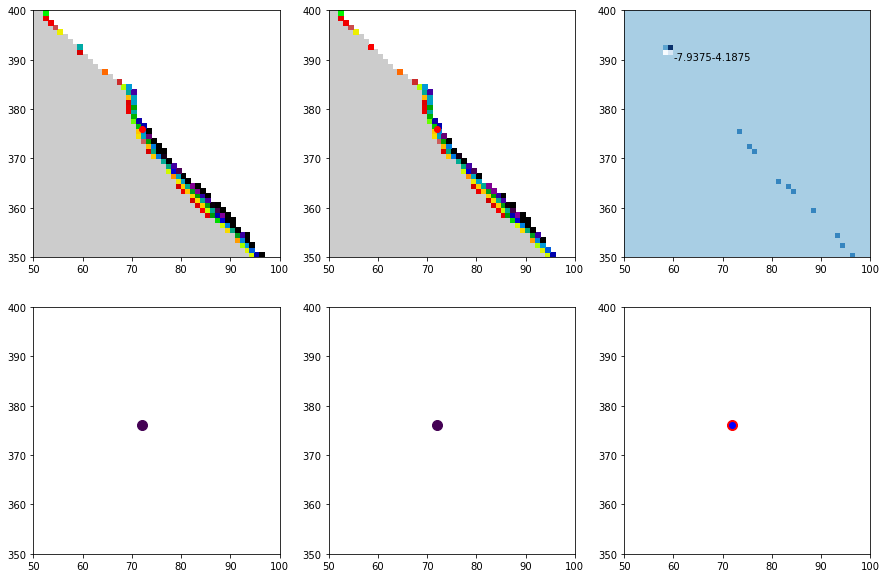

In [14]:
istart, iend = 350, 400
jstart, jend = 50, 100
make_the_plots(istart, iend, jstart,jend)

## Tile Fifty-nine, Sixty

* empty

## Tile Sixty-One

* reduce Long Harbour and Genoa Bay

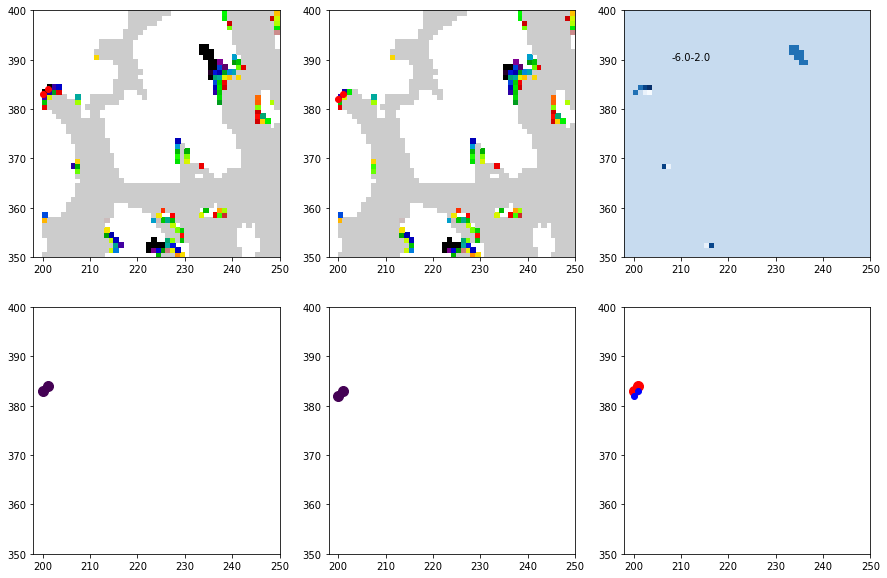

In [128]:
istart, iend = 350, 400
jstart, jend = 198, 250
make_the_plots(istart, iend, jstart,jend)

## Tile Sixty-two

* coastline edits, pass is fine

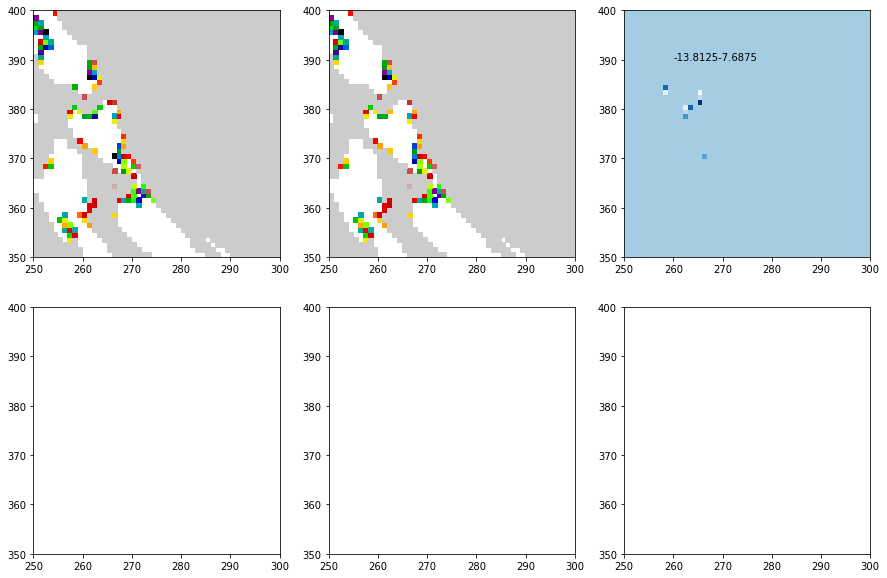

In [20]:
istart, iend = 350, 400
jstart, jend = 250, 300
make_the_plots(istart, iend, jstart,jend)

48.88760757446289 -123.32569885253906


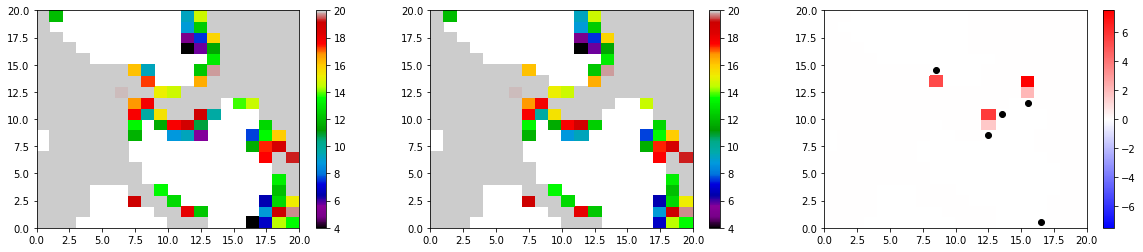

In [126]:
js, je = 250, 270
ii, ie = 370, 390
print (b201702.nav_lat[ii+17,js+12].item(), b201702.nav_lon[ii+17, js+12].item())
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=6)

## Tile Sixty-three

* Boundary Bay: remove alot of flats
* new river

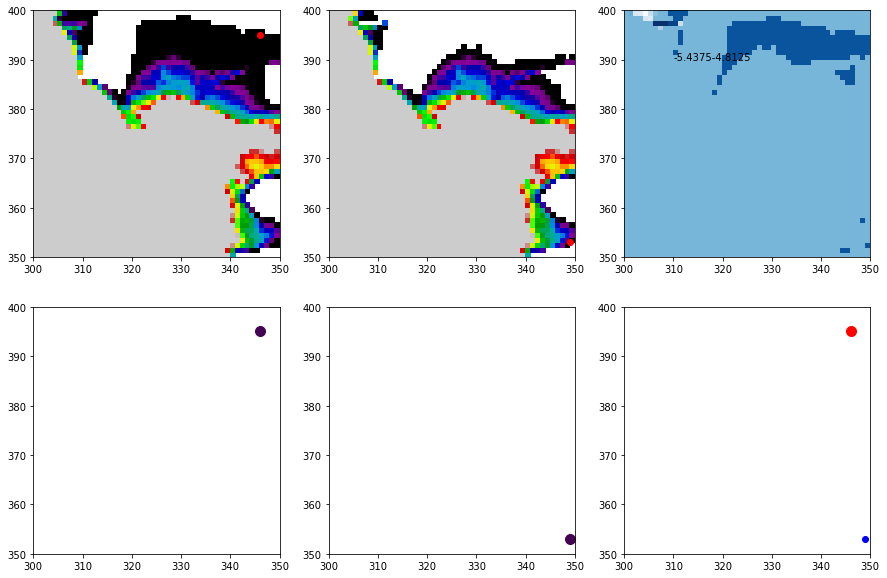

In [21]:
istart, iend = 350, 400
jstart, jend = 300, 350
make_the_plots(istart, iend, jstart,jend)

49.04854965209961 -122.88360595703125


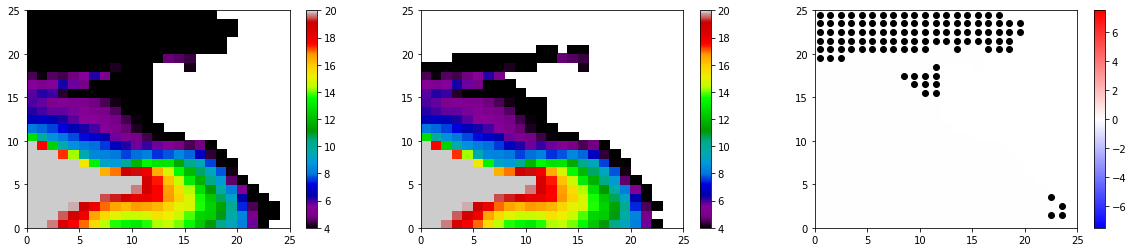

In [125]:
js, je = 335, 360
ii, ie = 370, 395
print (b201702.nav_lat[ii+17,js+12].item(), b201702.nav_lon[ii+17, js+12].item())
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=6)

## Tile Sixty-Four

* new rivers

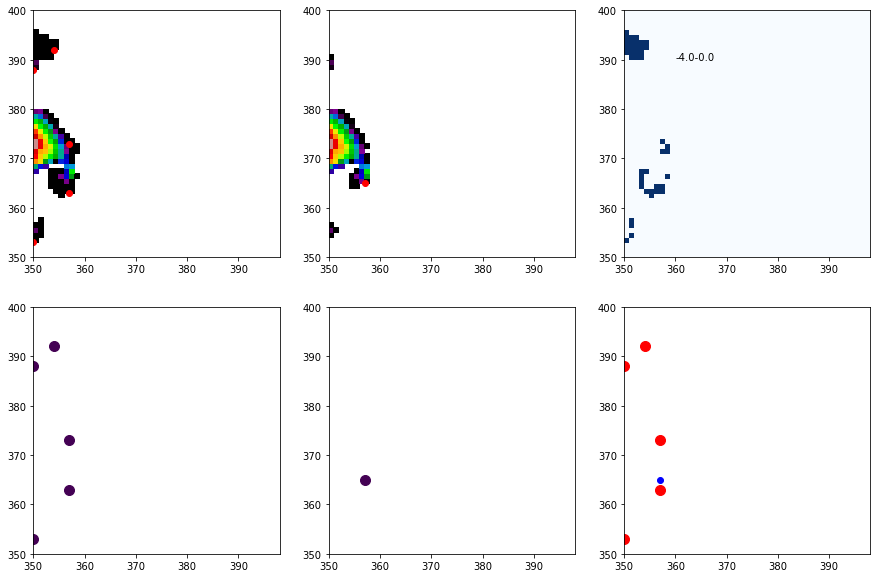

In [23]:
istart, iend = 350, 400
jstart, jend = 350, 398
make_the_plots(istart, iend, jstart,jend)

## Tile Sixty-Five

* coastline modification

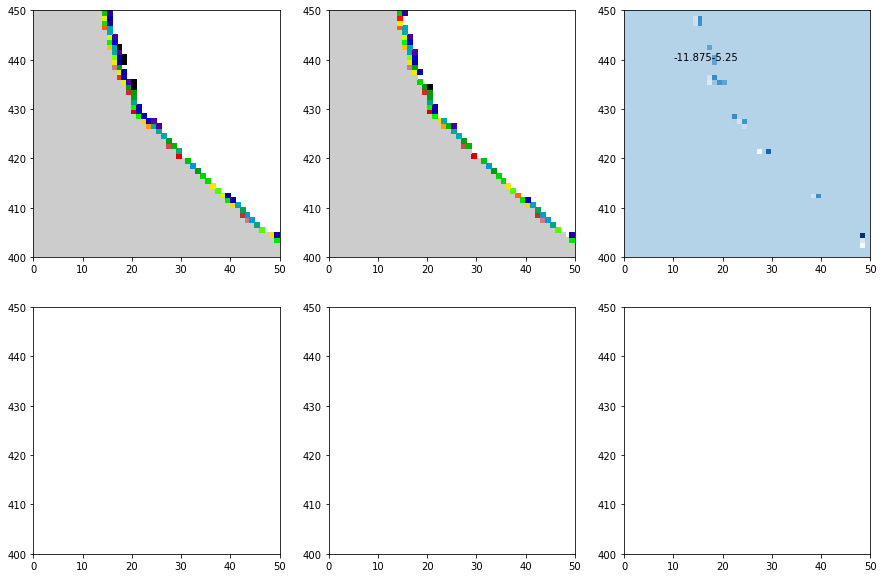

In [24]:
istart, iend = 400, 450
jstart, jend = 0, 50
make_the_plots(istart, iend, jstart,jend)

## Tile Sixty-six

* reduce San Juan harbour (fine)

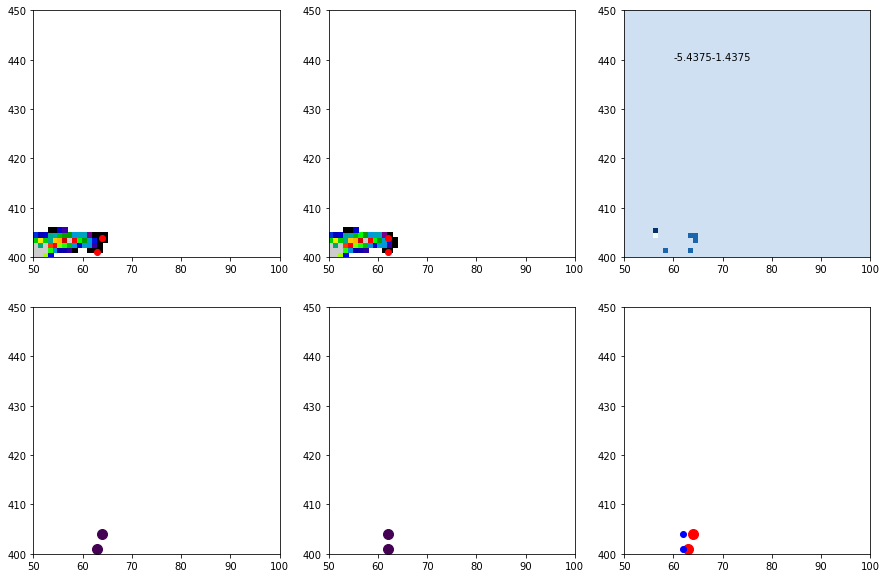

In [25]:
istart, iend = 400, 450
jstart, jend = 50, 100
make_the_plots(istart, iend, jstart,jend)

## Tile Sixty-seven, Sixty-eight

* empty

## Tile Sixty-nine

* connects  Thetis and Penelakut (good).  Removes dry end of Ladysmith Harbour (good), Removes Chemanius River Delta

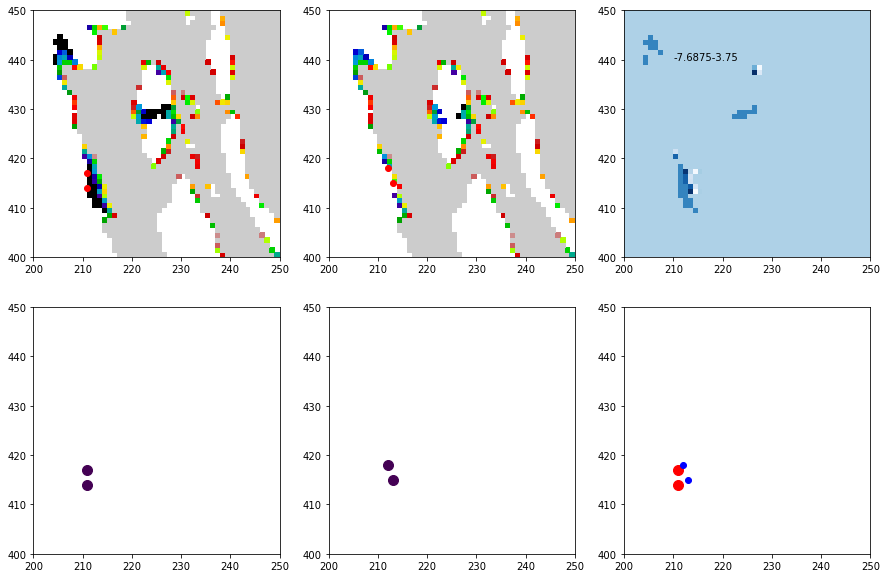

In [28]:
istart, iend = 400, 450
jstart, jend = 200, 250
make_the_plots(istart, iend, jstart,jend)

## Tile Seventy

* remove extra little island

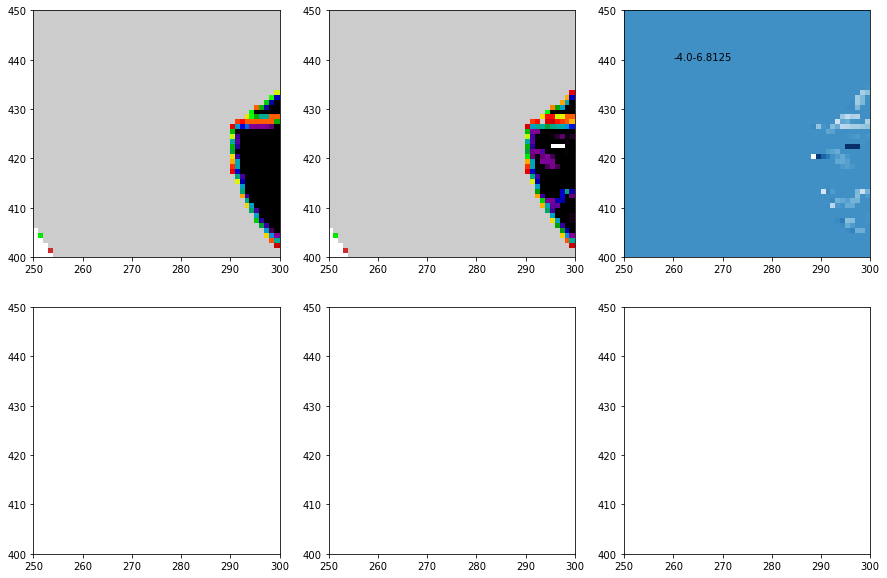

In [120]:
istart, iend = 400, 450
jstart, jend = 250, 300
make_the_plots(istart, iend, jstart,jend)

49.09158706665039 -123.26111602783203


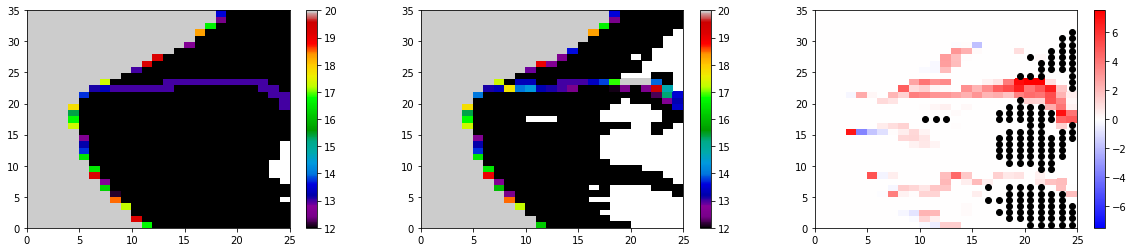

In [123]:
js, je = 285, 310
ii, ie = 405, 440
print (b201702.nav_lat[ii+17,js+12].item(), b201702.nav_lon[ii+17, js+12].item())
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=12, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=12, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=6)

## Tile Seventy-one

* Fraser River is narrower but deeper

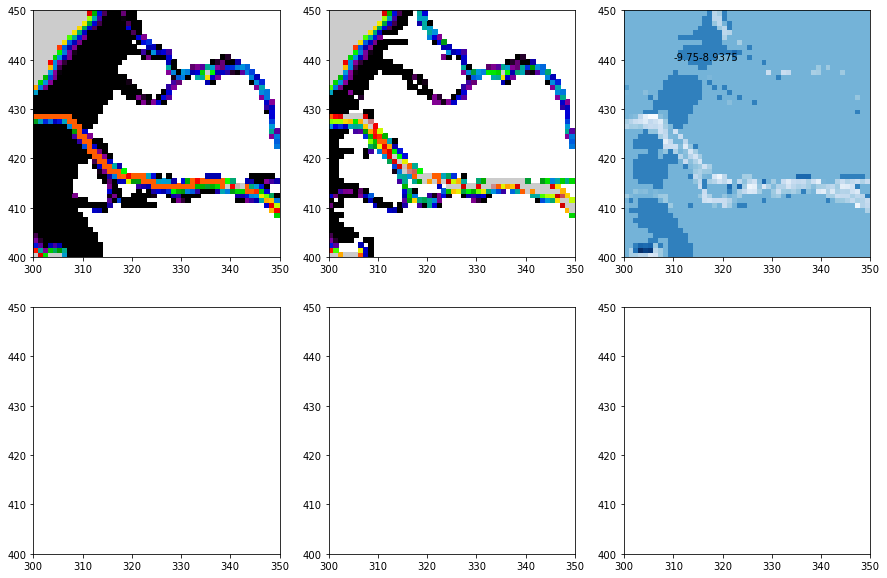

In [114]:
istart, iend = 400, 450
jstart, jend = 300, 350
make_the_plots(istart, iend, jstart,jend)

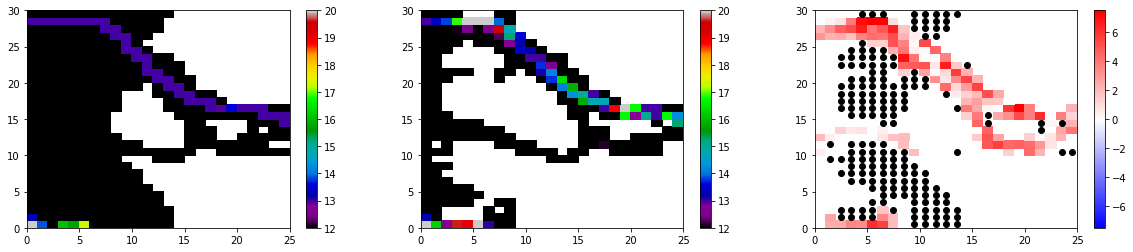

In [119]:
js, je = jstart, 325
ii, ie = 400, 430
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=12, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=12, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=6)

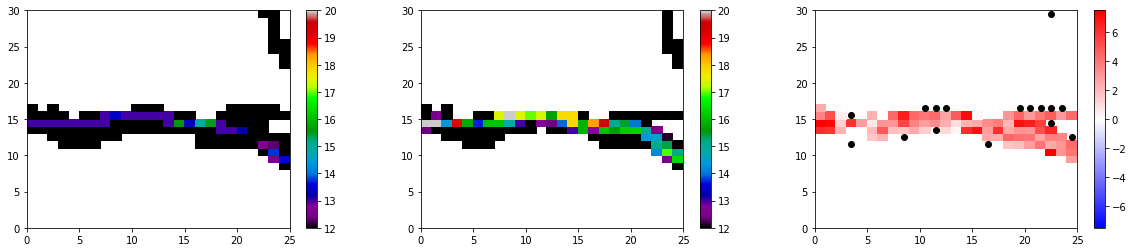

In [118]:
js, je = 325, jend
ii, ie = 400, 430
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=12, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=12, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=6)

## Tile Seventy-two

* Fraser is Deeper

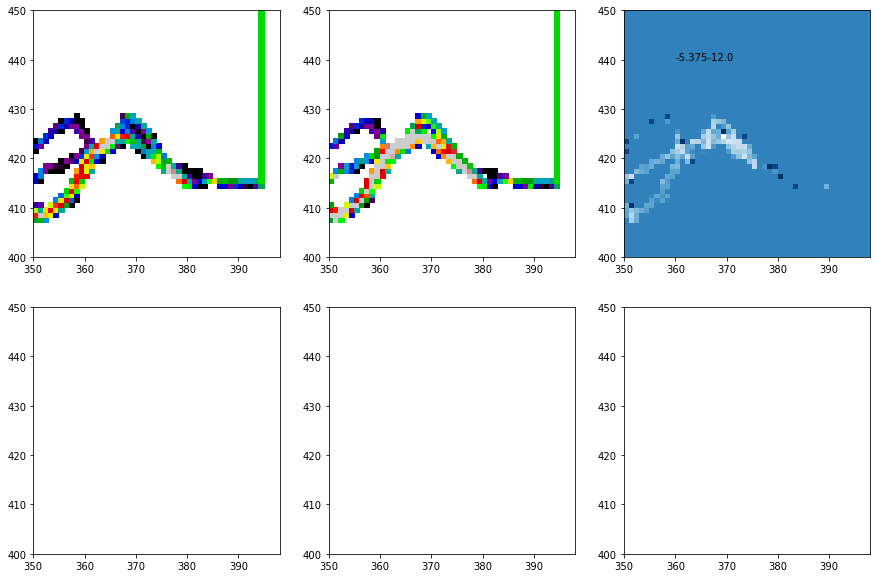

In [112]:
istart, iend = 400, 450
jstart, jend = 350, 398
make_the_plots(istart, iend, jstart,jend)

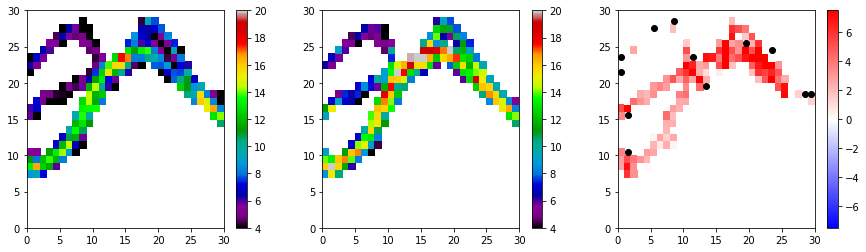

In [113]:
js, je = 350, 380
ii, ie = 400, 430
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=6)

## Tile Seventy-three

* removed hole near boundary

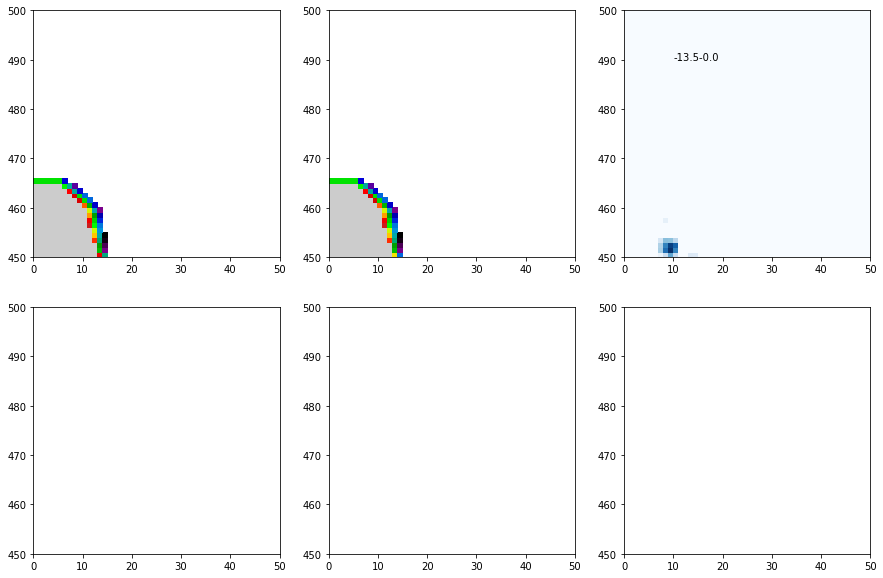

In [109]:
istart, iend = 450, 500
jstart, jend = 0, 50
make_the_plots(istart, iend, jstart,jend)

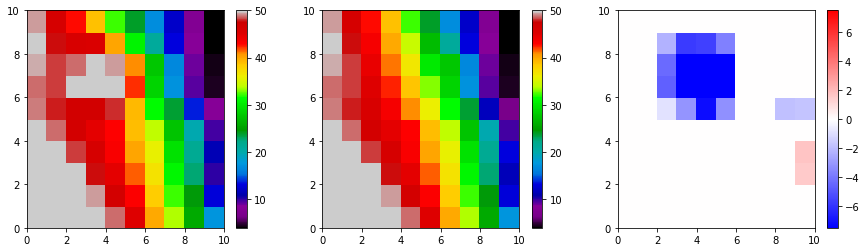

In [111]:
js, je = 5, 15
ii, ie = 445, 455
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=50);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=50);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=4)

## Tile Seventy-Four, Seventy-Five, Seventy-Six

* empty

## Tile Seventy-Seven

* coastline edits, removed Nanaimo River Delta

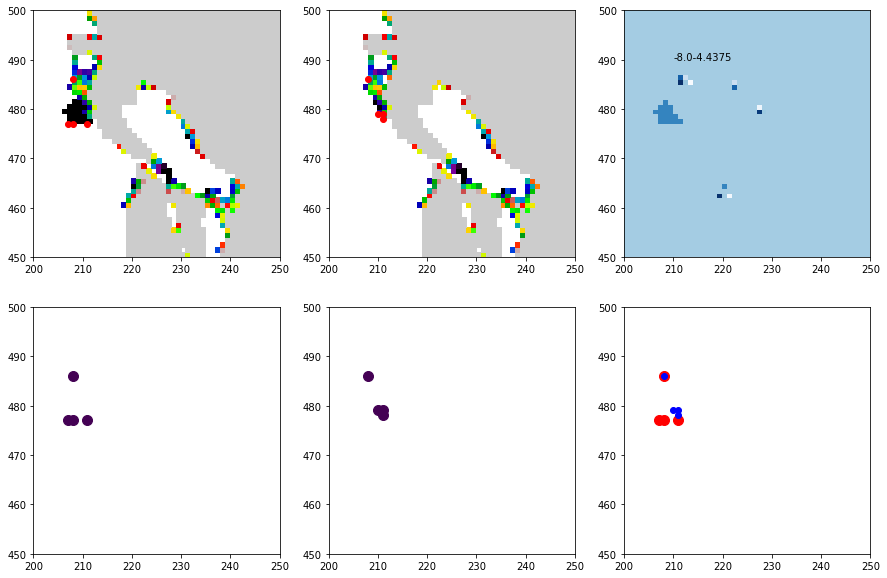

In [107]:
istart, iend = 450, 500
jstart, jend = 200, 250
make_the_plots(istart, iend, jstart,jend)

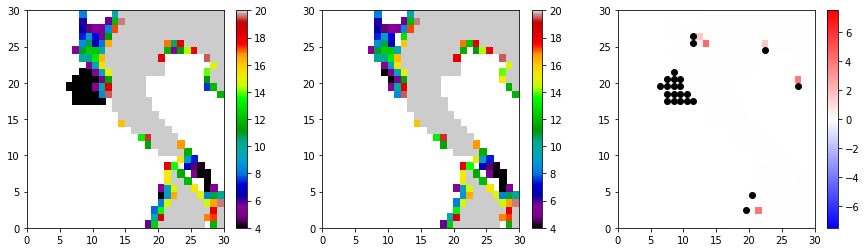

In [108]:
js, je = 200, 230
ii, ie = 460, 490
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=6)

# Tile Seventy-Eight

* no difference

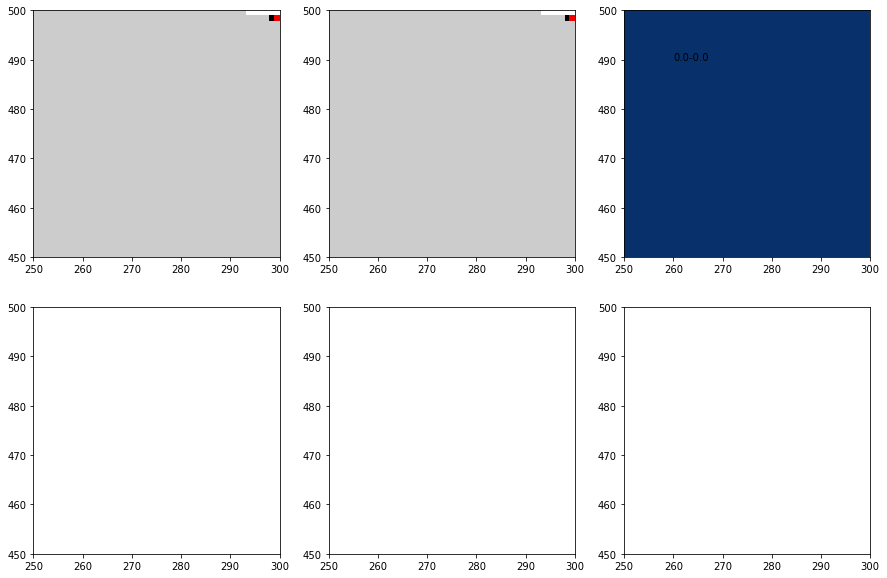

In [38]:
istart, iend = 450, 500
jstart, jend = 250, 300
make_the_plots(istart, iend, jstart,jend)

## Tile Seventy-nine

* new north arm of the river, some coastline edits
* lots of new rivers

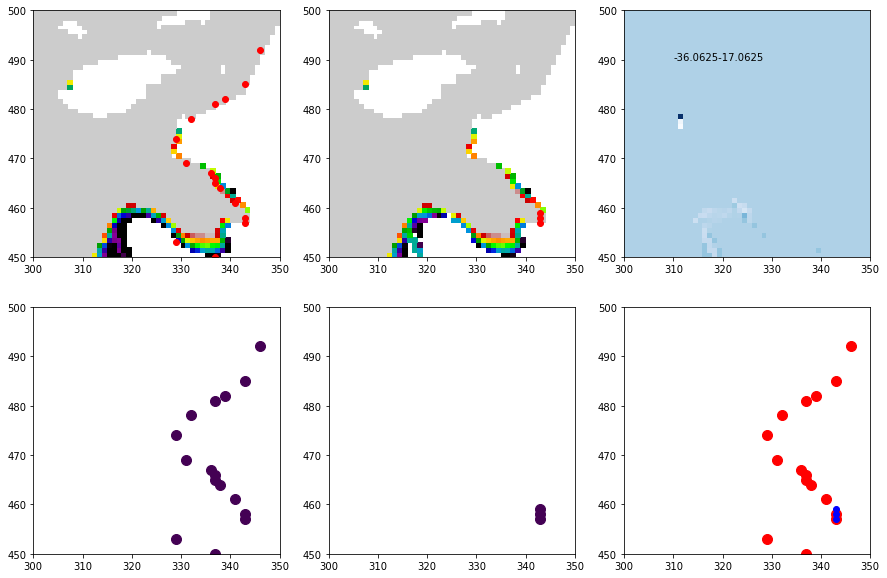

In [104]:
istart, iend = 450, 500
jstart, jend = 300, 350
make_the_plots(istart, iend, jstart,jend)

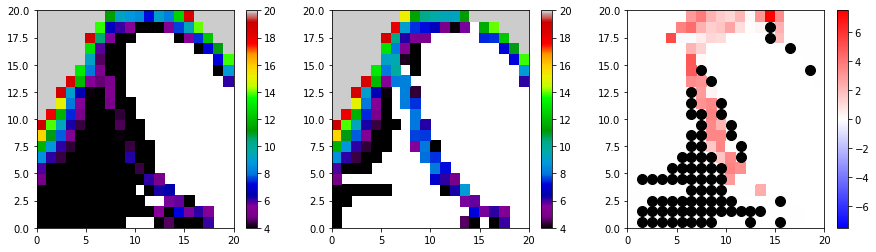

In [106]:
js, je = 310, 330
ii, ie = 440, 460
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=10)

## Tile Eighty
* no difference

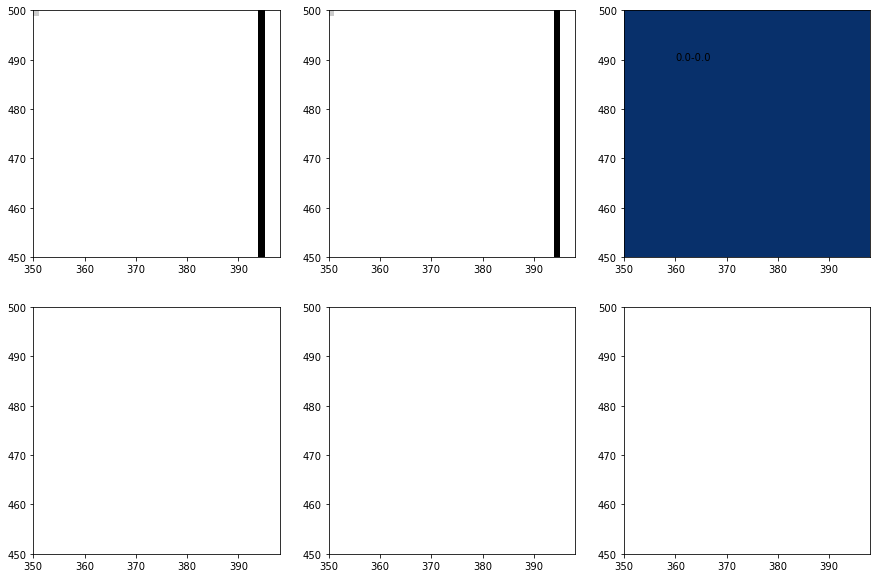

In [40]:
istart, iend = 450, 500
jstart, jend = 350, 398
make_the_plots(istart, iend, jstart,jend)

## Tile Eighty-one, Eighty-two, Eighty-three

* empty

## Tile Eighty-Four

* coastline edits

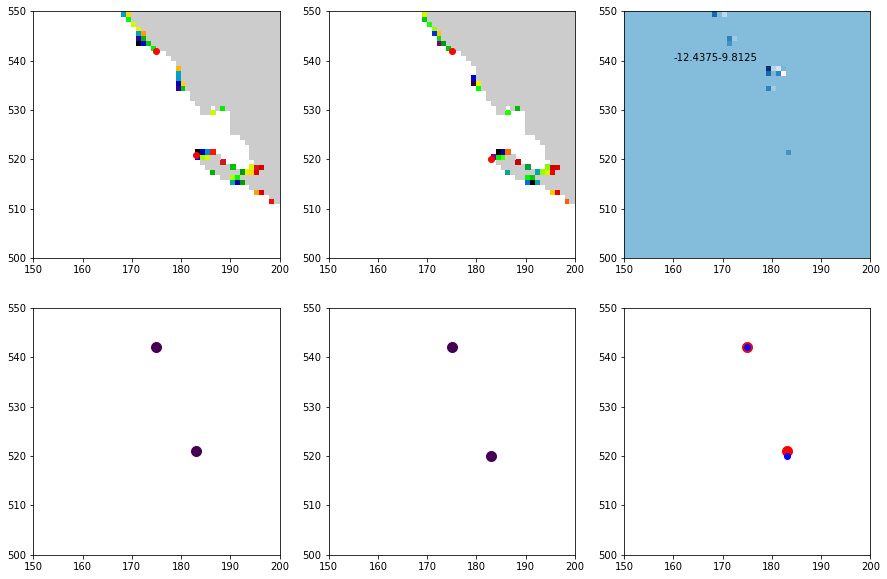

In [101]:
istart, iend = 500, 550
jstart, jend = 150, 200
make_the_plots(istart, iend, jstart,jend)

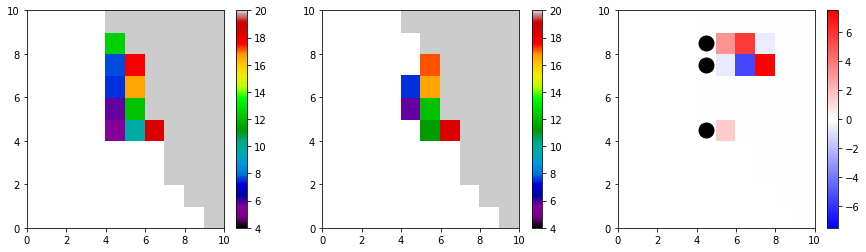

In [103]:
js, je = 175, 185
ii, ie = 530, 540
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=15)

## Tile Eighty-five

* coastline change

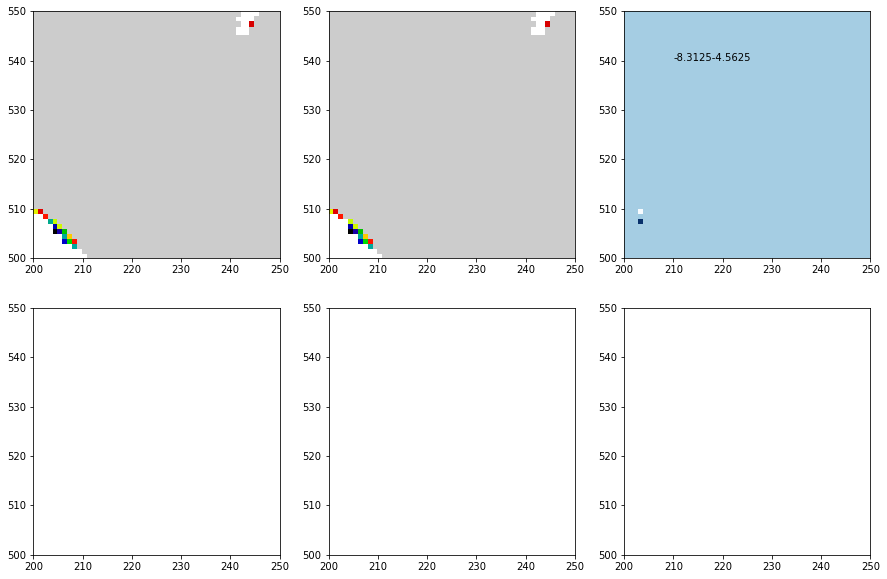

In [45]:
istart, iend = 500, 550
jstart, jend = 200, 250
make_the_plots(istart, iend, jstart,jend)

## Tile Eighty-six

* new Rivers

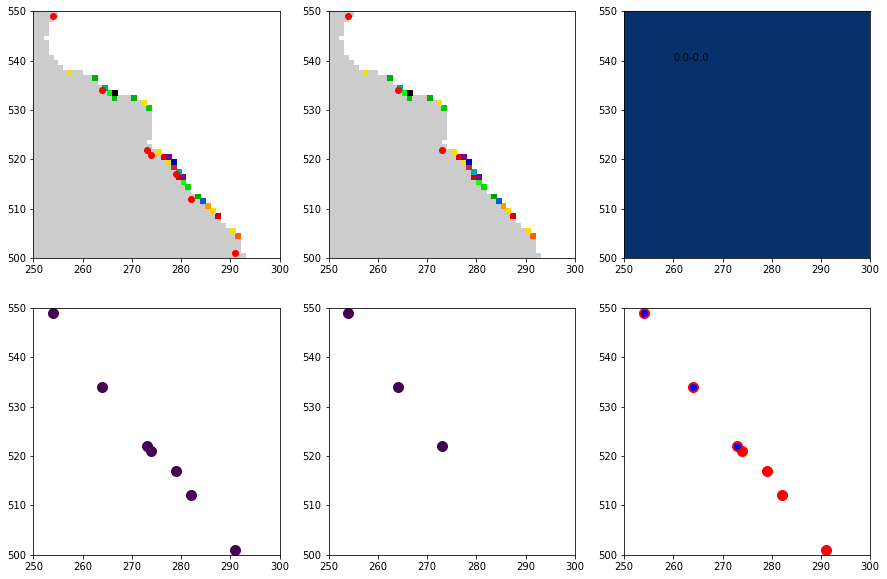

In [46]:
istart, iend = 500, 550
jstart, jend = 250, 300
make_the_plots(istart, iend, jstart,jend)

## Tile Eighty-seven

* good 
* new rivers

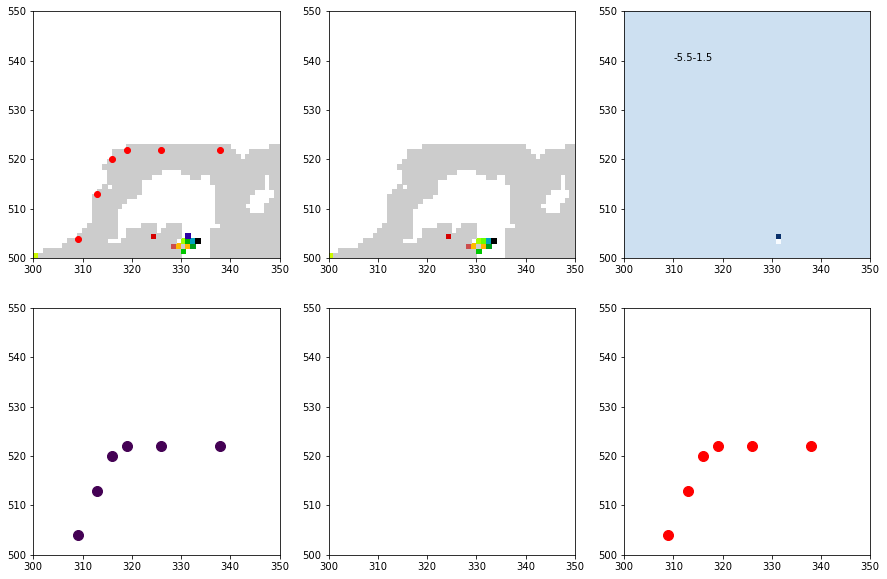

In [99]:
istart, iend = 500, 550
jstart, jend = 300, 350
make_the_plots(istart, iend, jstart,jend)

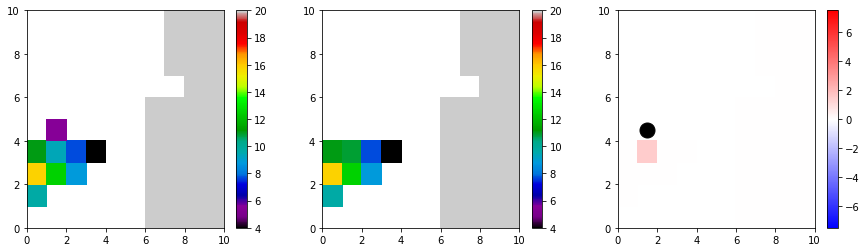

In [100]:
js, je = 330, 340
ii, ie = 500, 510
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=15)

## Eighty-eight

* As expected
* New Rivers

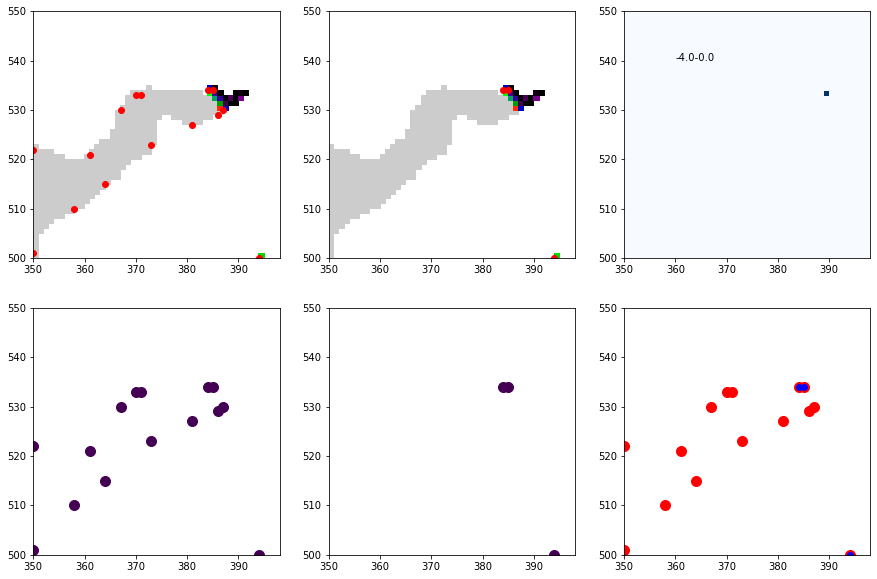

In [48]:
istart, iend = 500, 550
jstart, jend = 350, 398
make_the_plots(istart, iend, jstart,jend)

## Tile Eighty-nine, Ninety

* empty

## Tile Ninety-one

* coastline changes

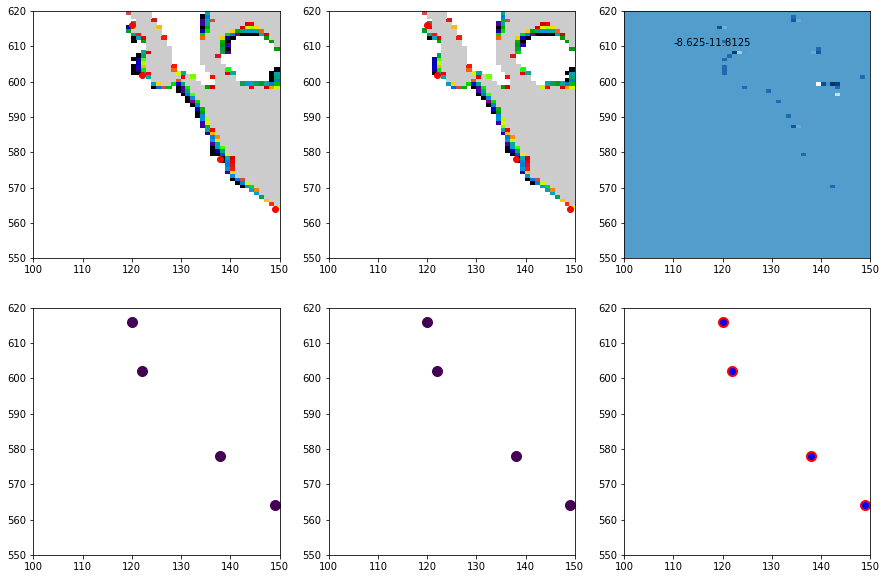

In [97]:
istart, iend = 550, 620
jstart, jend = 100, 150
make_the_plots(istart, iend, jstart,jend)

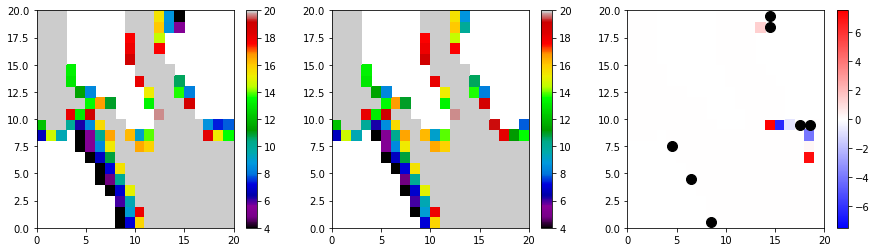

In [98]:
js, je = 125, 145
ii, ie = 590, 610
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=10)

## Tile Ninety-two

* Coastline Changes

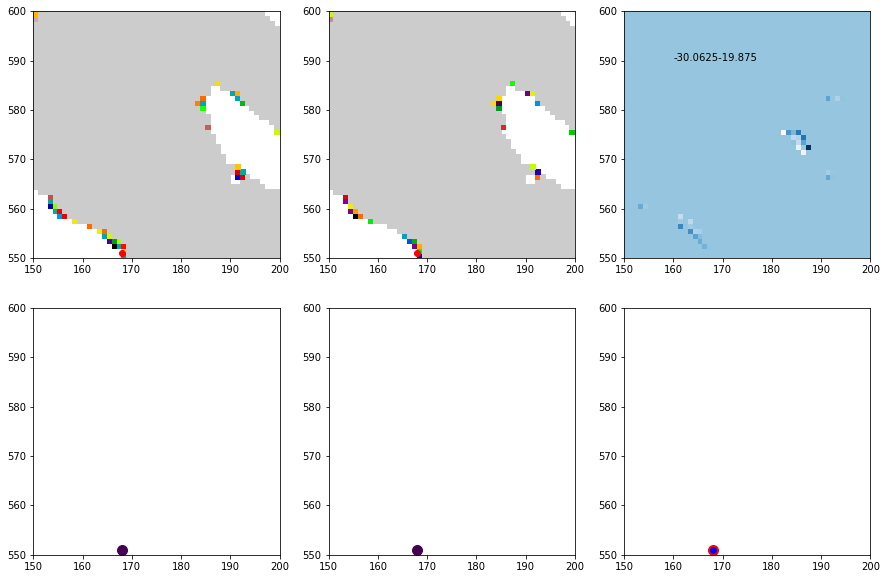

In [95]:
istart, iend = 550, 600
jstart, jend = 150, 200
make_the_plots(istart, iend, jstart,jend)

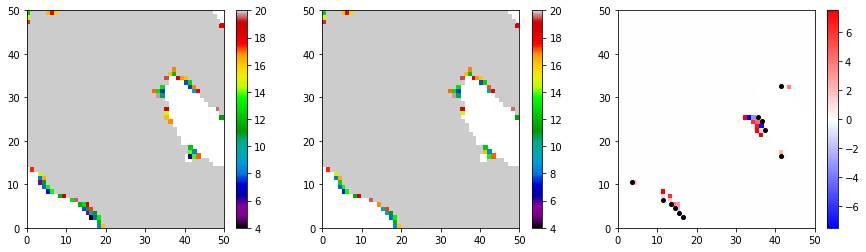

In [96]:
js, je = jstart, jend
ii, ie = istart, iend
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=4)

## Tile Ninety-three

* good

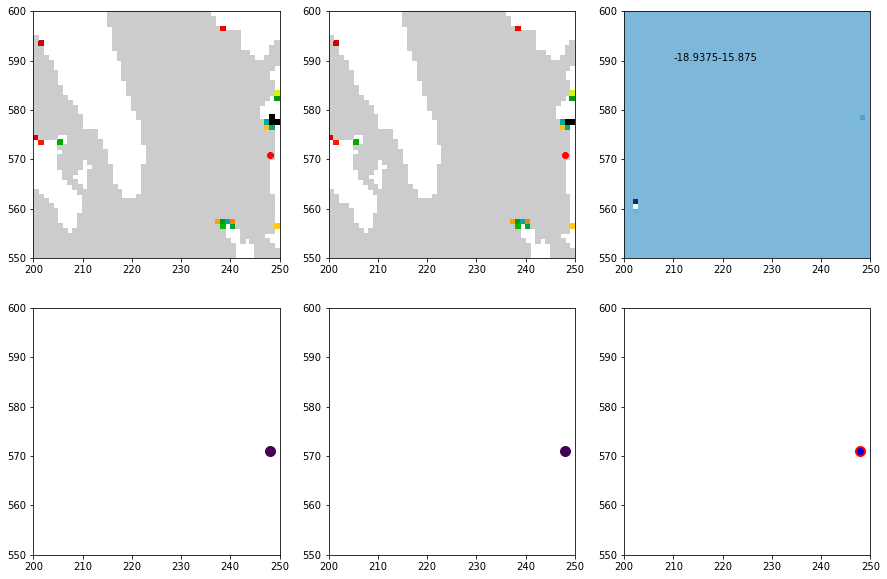

In [53]:
istart, iend = 550, 600
jstart, jend = 200, 250
make_the_plots(istart, iend, jstart,jend)

## Tile Ninety-four

* no change

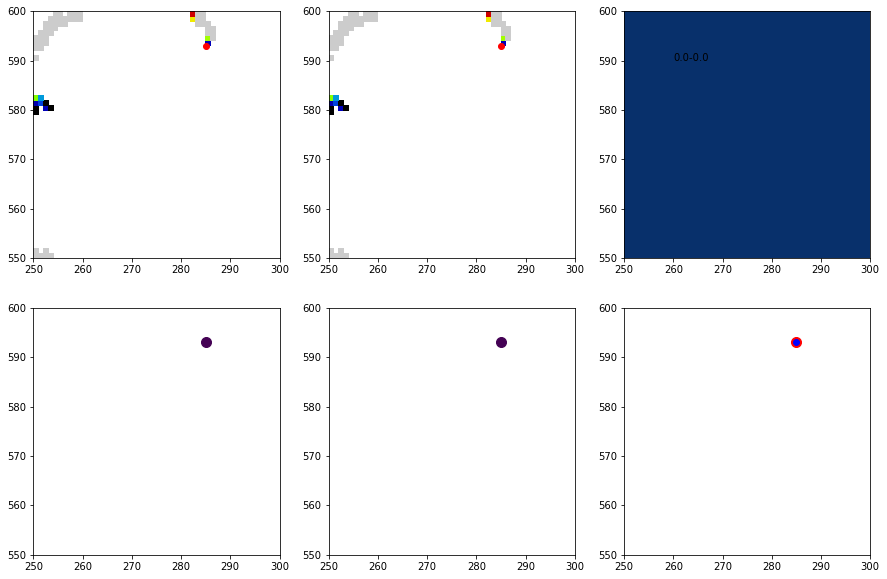

In [54]:
istart, iend = 550, 600
jstart, jend = 250, 300
make_the_plots(istart, iend, jstart,jend)

## Tile Ninety-five, Ninety-six

* empty